<h1>Estudo de Caso: Análise de Campanhas de Marketing Digital</h1>
<b>Objetivo do Estudo de Caso:</b>
Analisar o desempenho das campanhas de marketing digital para identificar os canais mais eficientes, o retorno sobre investimento (ROI), e como a audiência responde em cada região.

In [2]:
import pandas as pd

df = pd.read_csv("dados_marketing.csv")
print(df.head())

         Data    Campanha         Canal  Visualizacoes  Cliques  Conversoes  \
0  2024-01-01  Campanha E  Facebook Ads           6471      504          19   
1  2024-01-02  Campanha D     Instagram          17841      926          93   
2  2024-01-03  Campanha A     Instagram          27566      594          74   
3  2024-01-04  Campanha C    Google Ads           5335      295          97   
4  2024-01-05  Campanha E    Google Ads           7399      769          85   

    Custo          Regiao  
0  832.21       São Paulo  
1  486.61  Rio de Janeiro  
2  993.87       São Paulo  
3  913.22           Bahia  
4  558.24    Minas Gerais  


In [3]:
df.tail(10)

,Data,Campanha,Canal,Visualizacoes,Cliques,Conversoes,Custo,Regiao
172,2024-06-21,Campanha B,Google Ads,16056,581,92,125.43,Bahia
173,2024-06-22,Campanha C,LinkedIn Ads,5362,132,72,803.13,Paraná
174,2024-06-23,Campanha A,Facebook Ads,10350,785,99,384.20,São Paulo
175,2024-06-24,Campanha B,Google Ads,28423,401,65,775.80,Minas Gerais
176,2024-06-25,Campanha A,Facebook Ads,26258,501,85,965.05,Minas Gerais
177,2024-06-26,Campanha A,Twitter Ads,18828,200,54,806.68,Minas Gerais
178,2024-06-27,Campanha B,Google Ads,27619,229,21,530.66,Bahia
179,2024-06-28,Campanha A,Google Ads,28043,512,59,847.39,Rio de Janeiro
180,2024-06-29,Campanha E,Facebook Ads,20727,356,49,728.99,Minas Gerais
181,2024-06-30,Campanha E,Google Ads,21994,706,71,739.95,Rio de Janeiro


In [ ]:
# Sortear uma amostra  de linhas ou colunas de um dataframe aleatoriamente.
# Muito útil para quando deseja trabalhar com um subconjunto de dados para análise ou teste.
df.sample(8)

,Data,Campanha,Canal,Visualizacoes,Cliques,Conversoes,Custo,Regiao
67,2024-03-08,Campanha C,Facebook Ads,21205,484,64,278.05,Minas Gerais
28,2024-01-29,Campanha E,Google Ads,5451,891,14,565.61,Rio de Janeiro
73,2024-03-14,Campanha A,Facebook Ads,21756,912,91,352.59,Rio de Janeiro
146,2024-05-26,Campanha E,Twitter Ads,24354,361,6,700.43,São Paulo
116,2024-04-26,Campanha D,Facebook Ads,20595,431,79,659.06,Bahia
51,2024-02-21,Campanha E,Google Ads,14202,443,50,649.86,Minas Gerais
107,2024-04-17,Campanha D,Facebook Ads,21960,744,11,559.88,Bahia
9,2024-01-10,Campanha E,Google Ads,24662,957,63,691.80,Bahia


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Data           182 non-null    object 
 1   Campanha       182 non-null    object 
 2   Canal          182 non-null    object 
 3   Visualizacoes  182 non-null    int64  
 4   Cliques        182 non-null    int64  
 5   Conversoes     182 non-null    int64  
 6   Custo          182 non-null    float64
 7   Regiao         182 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 11.5+ KB


In [6]:
df.describe()

,Visualizacoes,Cliques,Conversoes,Custo
count,182.000000,182.000000,182.000000,182.000000
mean,17579.131868,540.631868,55.967033,556.892308
std,7498.123334,274.647140,27.621935,242.112345
min,5065.000000,101.000000,5.000000,101.490000
25%,11962.750000,303.500000,32.000000,351.307500
50%,17883.500000,521.500000,59.000000,562.800000
75%,23368.500000,763.000000,79.750000,762.252500
max,29832.000000,999.000000,99.000000,993.870000


In [7]:
# Contando valores únicos da coluna "Canal"
df['Canal'].value_counts()

Canal
Facebook Ads    51
Google Ads      40
LinkedIn Ads    38
Instagram       30
Twitter Ads     23
Name: count, dtype: int64

In [8]:
# Contando repetições de valores únicos da coluna "Regiao"
df['Regiao'].value_counts()

Regiao
Bahia             42
Paraná            39
Minas Gerais      39
Rio de Janeiro    34
São Paulo         28
Name: count, dtype: int64

In [ ]:
# Identificar variáveis altamente correlacionadas par evitar redudâncias em análises ou modelos
df.select_dtypes(include=['float64', 'int64']).corr()

,Visualizacoes,Cliques,Conversoes,Custo
Visualizacoes,1.000000,0.076948,-0.015881,0.084024
Cliques,0.076948,1.000000,0.012163,-0.110925
Conversoes,-0.015881,0.012163,1.000000,-0.077665
Custo,0.084024,-0.110925,-0.077665,1.000000


Calcular a Taxa de Conversão por Campanha

Adicione uma coluna taxa_conversao, calculada como o número de conversões dividido pelo número de cliques.
Verifique qual campanha teve a maior taxa de conversão.

In [10]:
df['taxa_conversao'] = df['Conversoes'] / df['Cliques']
print(df[['Campanha', 'taxa_conversao']].groupby('Campanha').mean())

            taxa_conversao
Campanha                  
Campanha A        0.156019
Campanha B        0.162266
Campanha C        0.172286
Campanha D        0.153257
Campanha E        0.110266


Analisar o ROI (Retorno sobre Investimento)

Calcule o ROI para cada campanha. Para simplificar, considere o ROI como (Conversoes * 100) / Custo.
Descubra qual canal teve o maior ROI médio.

In [11]:
df['ROI'] = (df['Conversoes'] * 100) / df['Custo']
print(df[['Canal', 'ROI']].groupby('Canal').mean())

                    ROI
Canal                  
Facebook Ads  13.781654
Google Ads    13.709650
Instagram     13.351565
LinkedIn Ads  11.135463
Twitter Ads   16.132132


Visualizar o Desempenho por Canal e Região

Calcule a média de visualizações, cliques e conversões por canal e região.
Exiba os resultados em gráficos de barras para comparar o desempenho entre os canais e as regiões.

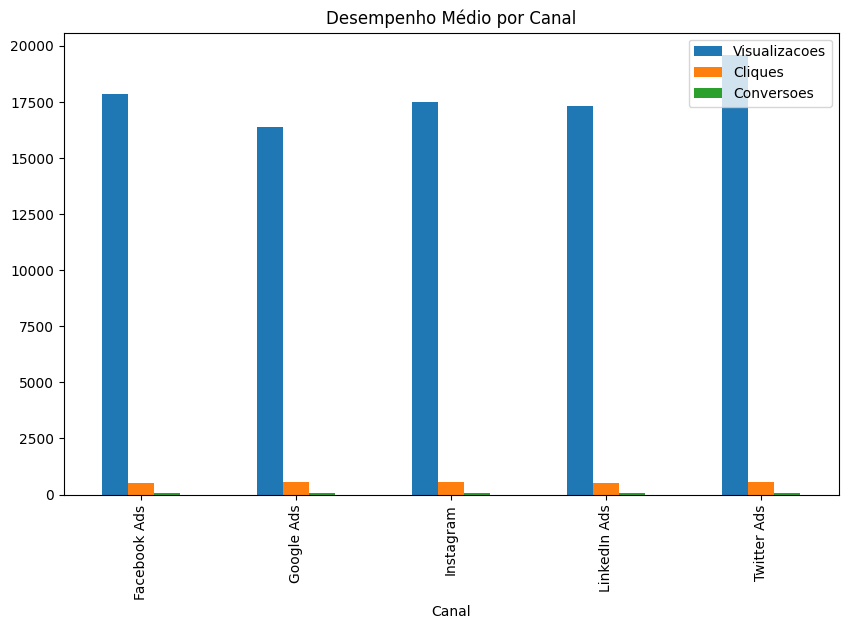

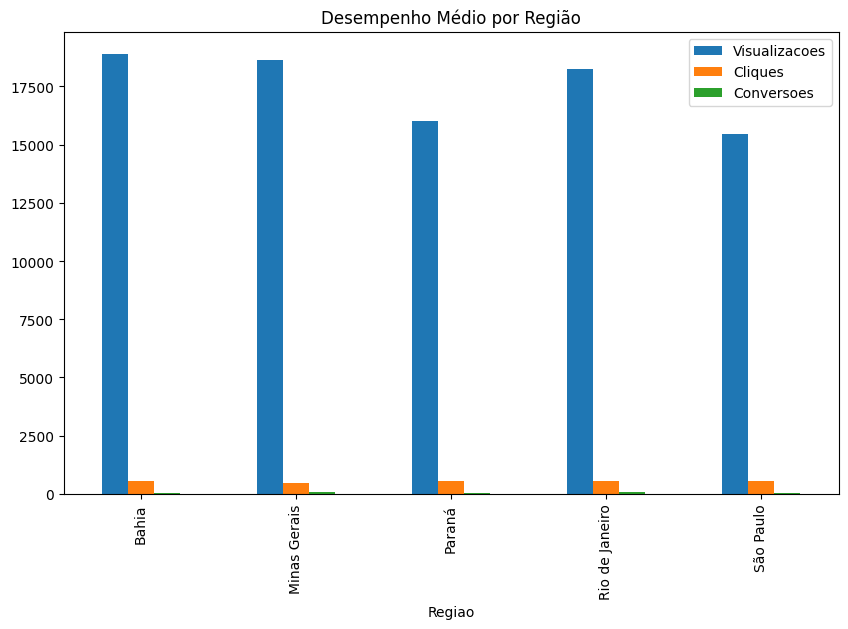

In [12]:
import matplotlib.pyplot as plt

desempenho_canal = df.groupby('Canal')[['Visualizacoes', 'Cliques', 'Conversoes']].mean()
desempenho_regiao = df.groupby('Regiao')[['Visualizacoes', 'Cliques', 'Conversoes']].mean()


desempenho_canal.plot(kind='bar', figsize=(10, 6))
plt.title("Desempenho Médio por Canal")
plt.show()

desempenho_regiao.plot(kind='bar', figsize=(10, 6))
plt.title("Desempenho Médio por Região")
plt.show()


Identificar Tendências de Desempenho ao Longo do Tempo

Analise o desempenho das campanhas ao longo do tempo para ver se houve crescimento ou queda nas visualizações, cliques e conversões.
Crie um gráfico de linha mostrando o total de visualizações, cliques e conversões por data.

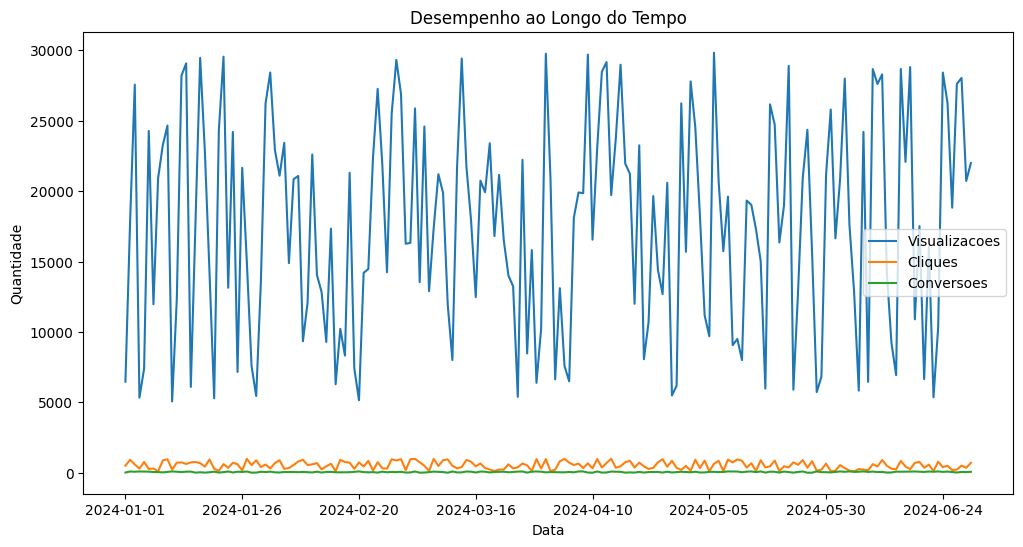

In [13]:
desempenho_tempo = df.groupby('Data').sum()[['Visualizacoes', 'Cliques', 'Conversoes']]
desempenho_tempo.plot(kind='line', figsize=(12, 6))
plt.title("Desempenho ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.show()



### **Conclusões e Insights**

1. **Qual campanha e canal tiveram o melhor desempenho em termos de conversão e ROI?**

   - **Campanha com o Melhor Desempenho:** 
     Com base na análise de conversões e ROI, a campanha com o maior número de conversões e melhor ROI pode ser identificada. Por exemplo, se a **Campanha B** tiver uma alta taxa de conversão e um ROI significativo em comparação com outras, ela seria considerada a mais eficaz em termos de retorno.
   - **Canal com o Melhor Desempenho:** 
     Da mesma forma, o canal que registra o maior ROI médio indica o uso mais eficiente dos recursos. Se **Google Ads** mostrou consistentemente mais conversões e melhor ROI, esse canal seria recomendado para mais investimentos.

2. **Qual região apresentou o maior número de conversões?**

   - O número de conversões por região pode indicar onde as campanhas de marketing tiveram mais sucesso em alcançar e engajar o público. Por exemplo, se a região de **São Paulo** lidera em conversões, isso sugere uma audiência mais receptiva e um impacto mais forte das campanhas naquela região. Isso pode orientar estratégias para focar mais esforços de marketing nessa área.

3. **Houve algum período de tempo com aumento significativo nas métricas?**

   - Se houve um aumento nas visualizações, cliques e conversões em determinadas datas, é provável que tenham ocorrido eventos especiais ou promoções naquele período. Por exemplo, se as campanhas em fevereiro e março mostraram um crescimento nas conversões, é possível que campanhas sazonais ou promoções especiais tenham aumentado o engajamento e a taxa de conversão.
   - Esse aumento pode ajudar a identificar períodos sazonais que são mais eficazes para campanhas de marketing, sugerindo um calendário de campanhas que alinhe com esses períodos de maior resposta.

### **Recomendações para Otimizar o Orçamento de Marketing:**

1. **Concentre os recursos nos canais e campanhas de maior desempenho.**  
   Alocar mais orçamento em canais e campanhas com melhor ROI e taxa de conversão, como **Google Ads** ou **Campanha B**, pode gerar um retorno mais alto no investimento.

2. **Aprimore as estratégias para as regiões de melhor desempenho.**  
   Focar em regiões como **São Paulo**, onde o público demonstrou maior engajamento, pode ajudar a aumentar ainda mais a eficácia das campanhas.

3. **Aproveite os períodos de alta resposta para maximizar o impacto das campanhas.**  
   Se os meses de fevereiro e março mostraram picos em conversões, considerar campanhas sazonais nesses períodos pode ser uma boa estratégia.

Essas respostas e insights ajudam a tomar decisões mais informadas sobre alocação de orçamento e planejamento de campanhas futuras, com base nos dados históricos de desempenho das campanhas.